#### Import the libraries to do the analytics and visualizing it

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset and get info on the columns

In [2]:
df = pd.read_csv('db_fbi/fbi.csv')
print("Hello")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           18 non-null     object 
 1   Date of Birth  11 non-null     float64
 2   Race           14 non-null     object 
 3   Sex            16 non-null     object 
 4   Last seen      5 non-null      float64
 5   Nationality    8 non-null      object 
 6   Eyes           12 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.1+ KB


#### What is the age of the most wanted in scatter plot

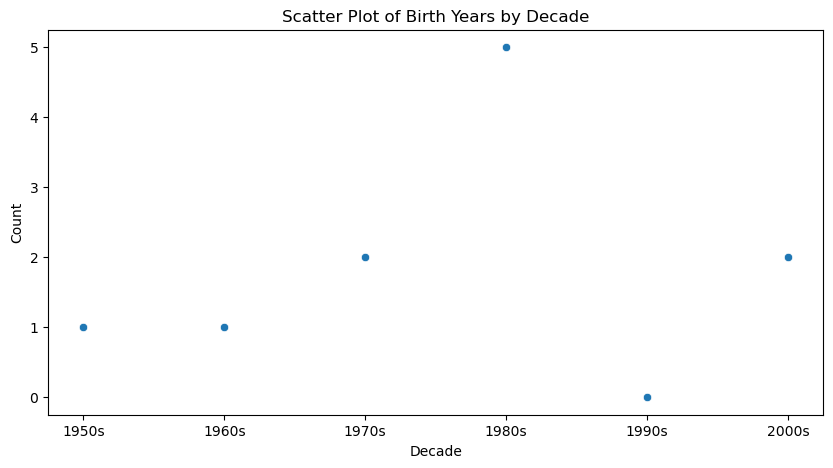

In [3]:
# There is a lot of criminals where det date of birth is not specified, so remove the NaN values
birth_years = df["Date of Birth"].dropna()

# Convert birth years to decades to have a more redeble plot
bin_edges = range(1950, 2011, 10)
df['Decade'] = pd.cut(birth_years, bins=bin_edges, labels=[f"{decade}s" for decade in bin_edges[:-1]], right=False)

# Calculate the count of individuals in each decade
count_per_decade = df['Decade'].value_counts()

# Create a scatter plot with count on the y-axis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=count_per_decade.index, y=count_per_decade.values)

plt.title('Scatter Plot of Birth Years by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')

plt.show()

#### What is the most common eye color

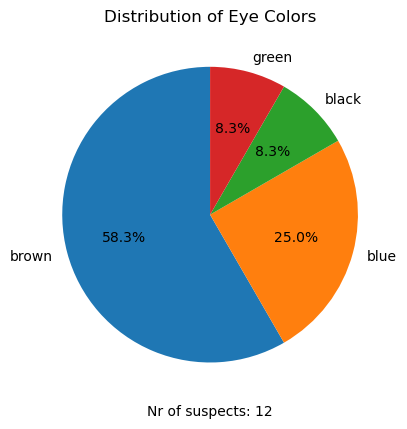

In [4]:
# get the count
eyes_counts = df['Eyes'].value_counts()
# remove the Na-n values
eyes_no = df["Eyes"].dropna()
# see the nr of suspects
nr_eyes = len(eyes_no)
# create a pie chart
plt.pie(eyes_counts, labels=eyes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Eye Colors')
plt.xlabel(f"Nr of suspects: {nr_eyes}")
plt.show()

#### View the different nationalities

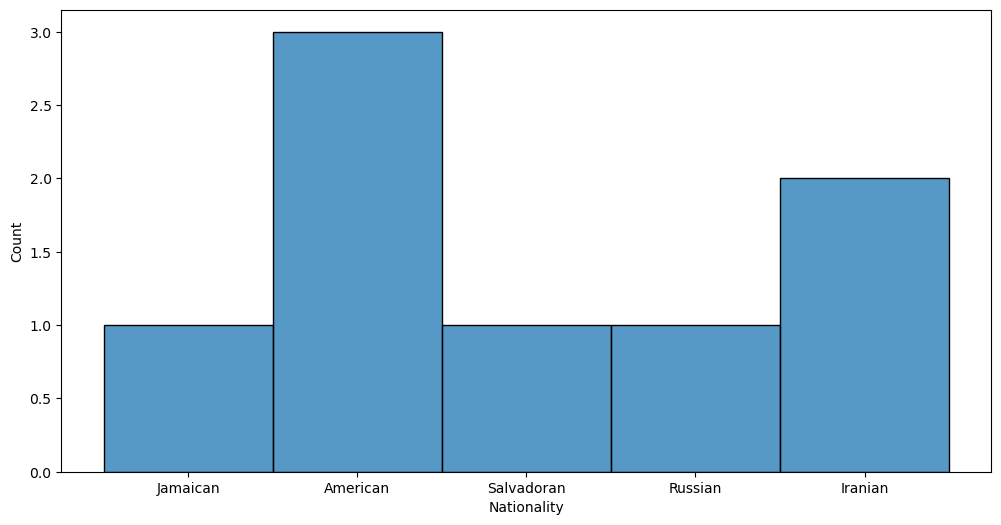

In [5]:
plt.figure(figsize=(12, 6))
# using seaborn to get the hisogram
sns.histplot(data=df, x='Nationality')
plt.show()

#### Get the race of the most wanted

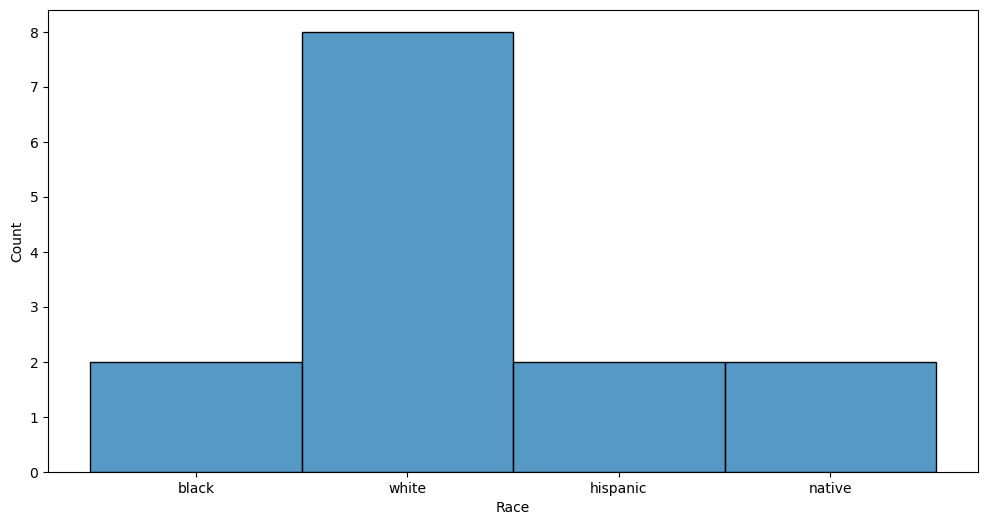

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Race')
plt.show()

#### Ratio between male and female

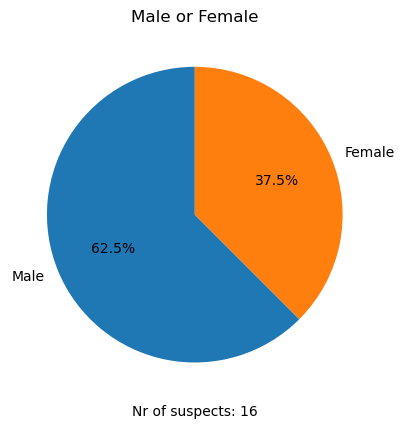

In [7]:
sex_counts = df['Sex'].value_counts()
sex_no = df["Sex"].dropna()
nr_sex = len(sex_no)

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Male or Female')
plt.xlabel(f"Nr of suspects: {nr_sex}")
plt.show()